To demonstrate the usage of the **curve_fit** function from the scipy module, here we fit a (pseudo) first-order reaction to a *exponential decay increasing to max* model with the formula:
$$y=c(1-e^{-kt}), k>0$$
where c is the upper limit, k is the (pseudo) first-order reaction rate constant. This model will increase very rapidly at first, and then level off to become asymptotic to the upper limit.
### First-order reactions

In a **first-order reaction**, the reaction rate is directly proportional to the concentration of one of the reactants. First-order reactions often have the general form A → products. 

##### The differential representation

Differential rate laws are generally used to describe what is occurring on a molecular level during a reaction, whereas integrated rate laws are used for determining the reaction order and the value of the rate constant from experimental measurements. The differential equation describing first-order kinetics is given below:
$$Rate=-\frac{d[A]}{dt}=k[A]$$
The "rate" is the reaction rate (in units of molar/time) and k is the reaction rate coefficient (in units of 1/time). However, the units of k vary for non-first-order reactions. These differential equations are separable, which simplifies the solutions as demonstrated below.

##### The integral representation

Rearrange the differential form to give:
$$\frac{d[A]}{[A]}=-kdt$$
Integrate both sides of the equation.
$$\int_{[A]_0}^{[A]}\frac{1}{[A]}d[A]=\int_{0}^{t}kdt$$
Remember from calculus that:
$$\int\frac{1}{x}dx=ln(x)+C$$
Upon integration,
$$ln[A]-ln[A]_0=-kt$$
Rearrange to get:
$$ln[A]=-kt+ln[A]_0$$
The equation is a straight line with slope $-k$ and y-intercept $ln[A]_0$.

This means to test if it the reaction is a first-order reaction, plot the natural logarithm of a reactant concentration versus time and see whether the graph is linear. If the graph is linear and has a negative slope, the reaction must be a first-order reaction.

To create another form of the rate law, raise each side of the previous equation to the exponent, e and simplify to get the second form of the rate law:
$$[A]=[A]_0e^{-kt}$$
The integrated forms of the rate law can be used to find the population of reactant at any time after the start of the reaction. Plotting ln[A] with respect to time for a first-order reaction gives a straight line with the slope of the line equal to -k.

This general relationship, in which a quantity changes at a rate that depends on its instantaneous value, is said to follow an exponential law. Exponential relations are widespread in science and in many other fields. Consumption of a chemical reactant or the decay of a radioactive isotope follow the exponential decay law. Its inverse, the law of exponential growth, describes the manner in which the money in a continuously-compounding bank account grows with time, or the population growth of a colony of reproducing organisms. The reason that the exponential function $y=e^{x}$  so efficiently describes such changes is that $\frac{dy}{dx}=e^{x}$; that is, $e^{x}$ is its own derivative, making the rate of change of y identical to its value at any point.

### Second-order reactions

The simplest kind of **second-order** reaction is one whose rate is proportional to the square of the concentration of one reactant. These generally have the form 2A → products. A second kind of second-order reaction has a reaction rate that is proportional to the product of the concentrations of two reactants. Such reactions generally have the form A + B → products. An example of the former is a dimerization reaction, in which two smaller molecules, each called a monomer, combine to form a larger molecule (a dimer).

##### Identical reactants

The differential rate law for the simplest second-order reaction in which 2A → products is as follows:
$$Rate=-\frac{d[A]}{dt}=k[A]^{2}$$
The separation of concentration and time terms yields
$$-\frac{d[A]}{[A]^{2}}=kdt$$
The integration then becomes
$$-\int_{[A]_0}^{[A]}\frac{1}{[A]^{2}}d[A]=\int_{0}^{t}kdt$$
And noting that
$$\int x^{n}dx=\frac{x^{n+1}}{n+1}+C, n\neq-1$$
the result of the integration is
$$\frac{1}{[A]}-\frac{1}{[A]_0}=kt$$
or
$$\frac{1}{[A]}=\frac{1}{[A]_0}+kt$$
This means a plot of $1/[A]$ as a function of time should produce a linear plot, the slope of which is $k$ , and the intercept of which is  $1/[A]_0$.

##### Different reactants and pseudo first-order approximation

A second-order reaction with different reactants can be challenging to follow mostly because the two reactants involved must be measured simultaneously. There can be additional complications because certain amounts of each reactant are required to determine the reaction rate, for example, which can make the cost of one's experiment high if one or both of the needed reactants are expensive. To avoid more complicated, expensive experiments and calculations, we can use the pseudo fist-order reaction, which involves treating a second-order reaction like a first-order reaction.

In second-order reactions with two reactant species, A + B → products, the rate of disappearance of A is
$$-\frac{d[A]}{dt}=k[A][B]$$
When $[B]_0>>[A]_0$, then $[B]\approx[B]_0$ and is a constant. Integration yields
$$ln[A]=-[B]kt+ln[A]_0$$
or
$$[A]=[A]_0e^{-[B]kt}$$
This functional form of the decay kinetics is similar to the first-order kinetics and the system is said to operate under pseudo-first-order kinetics. To reach a pseudo-1st-order reaction, we can manipulate the initial concentrations of the reactants. One of the reactants, B, for example, would have a significantly higher concentration, while the other reactant, A, would have a significantly lower concentration. We can then assume that the concentration of reactant B effectively remains constant during the reaction because its consumption is so small that the change in concentration becomes negligible. Because of this assumption, we can multiply the reaction rate, k, with the reactant with assumed constant concentration, B, to create a new rate constant k′=k[B] so that we can re-write the pseudo first-order reaction equation as
$$[A]=[A]_0e^{-k't}$$
or
$$ln[A]=-k't+ln[A]_0$$

### Pseudo first-order reaction example

In this example we are measuring the reaction rate of a novel thiol-reacting compound FDCP and comparing it to a known thiol-reacting compound dimedone. The thiol part of the reaction is from the reduced enzyme AhpC-SH. Instead of measuring the disappearance of the reactant, we are measuring the formation of the product AhpC-S-FDCP or AhpC-S-dimedone. So a *exponential decay increasing to max* model is used here with the formula $y=c(1-e^{-kt}), k>0$.

In [3]:
import pandas as pd
from scipy.optimize import curve_fit
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

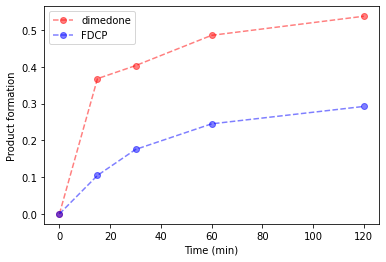

In [5]:
# load and view data
time = np.array([0,15,30,60,120])
dimedone = np.array([0,0.367695417,0.403122793,0.48551231,0.537391821])
FDCP = np.array([0,0.104669418,0.175177001,0.244871673,0.292193131])

plt.plot(time, dimedone, c = 'r', ls = '--', alpha = 0.5, marker = 'o', label = "dimedone")
plt.plot(time, FDCP, c = 'b', ls = '--', alpha = 0.5, marker = 'o', label = "FDCP")
plt.xlabel("Time (min)")
plt.ylabel("Product formation")
plt.legend(loc='upper left')

Text(0.5, 0, 'Time (min)')

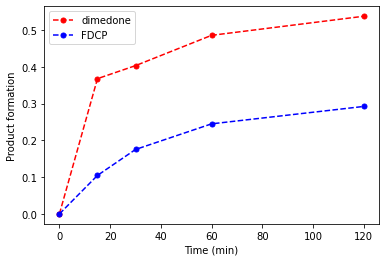

In [85]:
# Matplotlib object oriented method
fig, ax = plt.subplots()

ax.plot(time, dimedone, ls = '--', color = 'red', marker = 'o', markersize = 5, label = "dimedone")
ax.plot(time, FDCP, ls = '--', color = 'blue', marker = 'o', markersize = 5, label = "FDCP")
ax.legend(loc = 0)
ax.set_ylabel('Product formation')
ax.set_xlabel('Time (min)')

In [82]:
# Define the pseudo first order reaction function
def func(t,c,k):
    return c*(1-math.e**(-k*t))
# Fit the dimedone data to the function
param1, param_cov1 = curve_fit(func, time, dimedone)
c1, k1 = param1 # k1 is the pseudo first-order reaction rate for dimedone
# Fit the FDCP data to the function
param2, param_cov2 = curve_fit(func, time, FDCP)
c2, k2 = param2 # k2 is the pseudo first-order reaction rate for FDCP

<ipython-input-82-dae107e0f925>:3: RuntimeWarning: overflow encountered in power
  return c*(1-math.e**(-k*t))


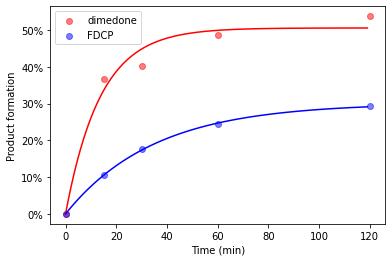

In [99]:
# define a sequence of inputs between the smallest and largest known inputs
x_time = np.arange(min(time), max(time), 1)
# calculate the output for the range
y_dimedone = func(x_time, c1, k1)
y_FDCP = func(x_time, c2, k2)

fig, ax = plt.subplots()
import matplotlib.ticker as mtick
plt.scatter(time, dimedone, c = "r", alpha=0.5, marker='o', label="dimedone")
plt.plot(x_time, y_dimedone, c = 'r')
plt.scatter(time, FDCP, c = "b", alpha=0.5, marker='o', label="FDCP")
plt.plot(x_time, y_FDCP, c = 'b')
plt.xlabel("Time (min)")
plt.ylabel("Product formation")
plt.legend(loc='upper left')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0)) # format y axis as percent